<a href="https://colab.research.google.com/github/Krisnawm/Python_Tugas/blob/main/Tugas_13_Python_Pathloss_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Numpy dan Matplotlib**

**Path Loss Simulation**

**Tugas 13 Krisna Wahyu M_1101208202_TTX 44-01**


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
np.zeros(4)

array([0., 0., 0., 0.])

In [6]:
np.ones(3)

array([1., 1., 1.])

**(Baris,Kolom)**

In [7]:
np.zeros((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [9]:
np.ones((5,2))

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [10]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
np.arange(2,10)

array([2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
np.arange(3,47,4)

array([ 3,  7, 11, 15, 19, 23, 27, 31, 35, 39, 43])

**Arange = (Awal,Akhir,delta)**

In [13]:
np.arange(4,5,0.1)

array([4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

In [14]:
np.arange(2,-4,-0.5)

array([ 2. ,  1.5,  1. ,  0.5,  0. , -0.5, -1. , -1.5, -2. , -2.5, -3. ,
       -3.5])

In [15]:
np.linspace(2,10,4)

array([ 2.        ,  4.66666667,  7.33333333, 10.        ])

In [16]:
np.linspace(2,-4,4)

array([ 2.,  0., -2., -4.])

In [18]:
e=np.arange(0,20,2)

In [19]:
len(e)

10

In [20]:
e.reshape(5,2)

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10],
       [12, 14],
       [16, 18]])

In [21]:
e.reshape(2,5)

array([[ 0,  2,  4,  6,  8],
       [10, 12, 14, 16, 18]])

In [22]:
print(e)

[ 0  2  4  6  8 10 12 14 16 18]


In [23]:
f=e.reshape(5,2)

In [24]:
print(f)

[[ 0  2]
 [ 4  6]
 [ 8 10]
 [12 14]
 [16 18]]


In [25]:
np.random.random((3,4))

array([[0.6901416 , 0.44874859, 0.2611169 , 0.45485995],
       [0.2942164 , 0.40096283, 0.23280205, 0.9883039 ],
       [0.38630448, 0.67509257, 0.37189438, 0.92957938]])

In [26]:
np.random.randint(1,20,10)

array([17, 11,  7, 10, 19,  8, 14, 14, 18,  3])

In [27]:
np.random.randn(3)

array([0.23173749, 0.85084534, 0.47851561])

**GRAFIK FREKUENSI 1800MHz (URBAN, OPEN, DAN SUB URBAN)**

In [28]:
def cos(frek,tipe,ht,hr,d):
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [29]:
f=1800 #MHz
loc1='urban'
loc2='open'
loc3='suburban'
tower=80 #m
user=1.5 #m
dmin=200 #m
dmax=700 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)

In [30]:
print(d)

[334 355 376 437 633 265 274 482 260 576 318 532 661 555 589 566 583 552
 655 518 613 453 403 314 248 550 604 264 485 423 248 642 687 317 382 221
 412 649 532 213 348 691 453 537 697 674 532 464 364 493 483 530 575 283
 592 299 428 276 453 259 225 682 444 460 511 307 513 690 423 223 311 246
 638 551 493 216 214 203 364 518 693 364 397 528 230 517 574 200 295 626
 679 421 523 513 646 202 296 222 386 673 687 321 405 453 550 497 407 272
 286 635 496 267 454 269 209 208 282 447 266 244 682 222 542 628 673 298
 415 325 313 601 367 648 483 512 266 589 469 366 351 356 506 274 236 434
 261 387 574 582 522 214 483 363 255 610 473 503 301 541 467 218 678 374
 558 411 599 528 341 520 456 325 560 307 251 561 276 543 517 395 282 421
 479 278 288 460 304 505 210 370 563 485 320 571 206 298 253 677 684 399
 211 288]


In [31]:
LpUrban=cos(f,loc1,tower,user,d)
LpOpen=cos(f,loc2,tower,user,d)
LpSuburban=cos(f,loc3,tower,user,d)

In [32]:
print(LpUrban, LpOpen, LpSuburban)

[176.86444747 177.72338111 178.53293625 180.65071828 185.87019368
 173.6047348  174.07519091 182.03132336 173.3364174  184.5409774
 176.17295956 183.42162621 186.47989418 184.01782092 184.85536142
 184.29427692 184.71113247 183.94147257 186.35144736 183.04597095
 185.41794817 181.15724431 179.50978046 175.99465037 172.67080204
 183.89034279 185.20960232 173.55147864 182.11872533 180.19205607
 172.67080204 186.06906151 187.0233476  176.12859342 178.75594203
 171.04713715 179.8209002  186.22181849 183.42162621 170.52777003
 177.44284933 187.10512569 181.15724431 183.5533974  187.22690949
 186.75424156 183.42162621 181.49520734 178.07604525 182.34918016
 182.06051765 183.36857064 184.51650088 174.53044108 184.92692586
 175.30513732 180.35758368 174.17763673 181.15724431 173.28213511
 171.29981187 186.92045278 180.87456785 181.37324781 182.8543185
 175.67707279 182.90934294 187.08472564 180.19205607 171.17404105
 175.85942145 172.55674281 185.98102224 183.91593088 182.34918016
 170.7247835

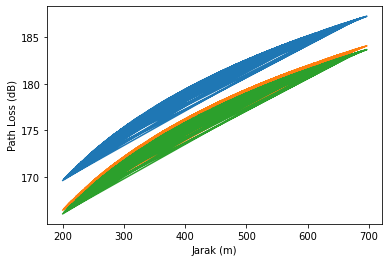

In [33]:
plt.figure()
plt.plot(d,LpUrban)
plt.plot(d,LpOpen)
plt.plot(d,LpSuburban)
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

In [34]:
d_sort=d[np.argsort(d)]
Urban_sort1=LpUrban[np.argsort(d)]
Open_sort2=LpOpen[np.argsort(d)]
Suburban_sort3=LpSuburban[np.argsort(d)]

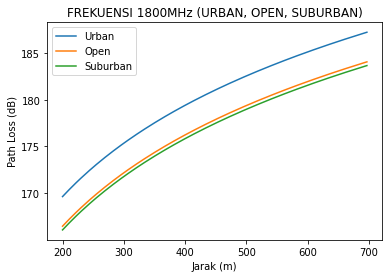

In [35]:
plt.figure()
plt.title('FREKUENSI 1800MHz (URBAN, OPEN, SUBURBAN)')
plt.plot(d_sort,Urban_sort1, label='Urban')
plt.plot(d_sort,Open_sort2, label="Open")
plt.plot(d_sort,Suburban_sort3, label="Suburban")
plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

**GRAFIK MODEL URBAN (700MHz, 900MHz, dan 1800MHz)**

In [36]:
def cos(frek,tipe,ht,hr,d):
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [37]:
f1=700 #MHz
f2=900 #MHz
f3=1800 #MHz
loc='urban'
tower=80 #m
user=1.5 #m
dmin=200 #m
dmax=700 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)

In [38]:
print(d)

[471 244 433 491 462 394 605 421 317 691 205 224 241 329 282 425 345 553
 563 345 339 301 466 239 298 579 431 494 497 569 643 448 405 511 358 516
 410 337 482 600 331 210 328 420 220 554 403 566 271 618 403 462 349 431
 453 631 310 209 235 625 341 317 491 427 212 457 359 448 402 573 274 490
 389 440 336 649 376 595 538 592 436 353 214 239 566 532 495 413 393 251
 229 558 455 479 640 666 326 244 403 641 257 273 210 392 434 295 381 242
 528 306 574 628 485 258 489 543 691 415 525 665 202 241 433 651 514 313
 256 477 646 612 369 244 535 402 554 598 280 589 543 509 248 233 668 326
 353 368 586 674 481 254 528 696 401 665 300 234 267 580 307 558 657 529
 604 591 212 678 433 648 229 325 212 437 241 543 690 458 569 586 578 268
 347 282 660 235 490 233 521 249 397 335 226 372 373 620 619 413 237 574
 325 548]


In [39]:
LpUrban700=cos(f1,loc,tower,user,d)
LpUrban900=cos(f2,loc,tower,user,d)
LpUrban1800=cos(f3,loc,tower,user,d)

In [40]:
print(LpUrban700, LpUrban900, LpUrban1800)

[169.06707071 159.80269499 167.88213125 169.65286146 168.79530207
 166.5525761  172.59384713 167.48623903 163.48953593 174.4660682
 157.34946056 158.59800934 159.62843003 164.01292384 161.84152075
 167.61944322 164.6818323  171.32791053 171.58035882 164.6818323
 164.43469899 162.75998842 168.9167359  159.51104404 162.61888971
 171.97509533 167.81691707 169.73866622 169.82395147 171.72968429
 173.45192813 168.36184517 166.94045696 170.21526101 165.20286208
 170.35242117 167.1132964  164.35134823 169.39226587 172.47694822
 164.09829524 157.6889044  163.97004333 167.45274023 158.34419639
 171.35335993 166.87072297 171.65521943 161.28105401 172.89332053
 166.87072297 168.79530207 164.84421148 167.81691707 168.51818682
 173.18655944 163.17499762 157.62166686 159.27329599 173.05197653
 164.51755945 163.48953593 169.65286146 167.68557591 157.82242424
 168.64202267 165.24215426 168.36184517 166.83572609 171.82836237
 161.43613342 169.62414333 166.37267279 168.10803223 164.30948716
 173.5827609

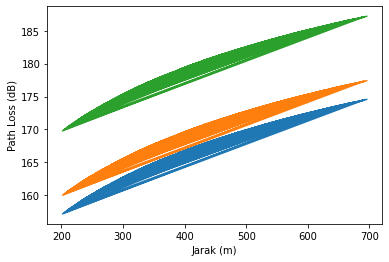

In [41]:
plt.figure()
plt.plot(d,LpUrban700)
plt.plot(d,LpUrban900)
plt.plot(d,LpUrban1800)
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

In [42]:
d_sort=d[np.argsort(d)]
Urban_sort1=LpUrban700[np.argsort(d)]
Urban_sort2=LpUrban900[np.argsort(d)]
Urban_sort3=LpUrban1800[np.argsort(d)]

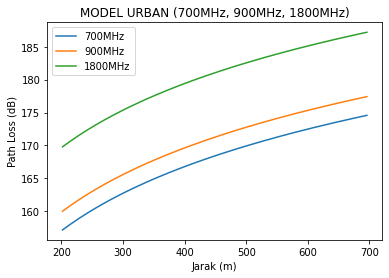

In [43]:
plt.figure()
plt.plot(d_sort,Urban_sort1, label='700MHz')
plt.plot(d_sort,Urban_sort2, label='900MHz')
plt.plot(d_sort,Urban_sort3, label='1800MHz')
plt.legend()
plt.title('MODEL URBAN (700MHz, 900MHz, 1800MHz)')
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()